In [34]:
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
import pickle

In [2]:
data = pd.read_excel('Assignment-1_Data.xlsx')

In [3]:
data.head(20)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy',
       'Belgium', 'Lithuania', 'Japan', 'Iceland', 'Sweden', 'Austria',
       'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Unspecified', 'Brazil',
       'USA', 'Malta', 'RSA'], dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


In [6]:
data['Itemname'].isna().value_counts()

Itemname
False    520609
True       1455
Name: count, dtype: int64

In [7]:
data.duplicated().value_counts()

False    516778
True       5286
Name: count, dtype: int64

In [8]:
df = data.dropna(subset='Itemname')

In [9]:
df.duplicated().value_counts()

False    515323
True       5286
Name: count, dtype: int64

In [10]:
df['CustomerID'].fillna(0, inplace=True)

C:\Users\thiru\AppData\Local\Temp\ipykernel_4676\544817467.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerID'].fillna(0, inplace=True)
C:\Users\thiru\AppData\Local\Temp\ipykernel_4676\544817467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'].fillna(0, inplace=True)


In [11]:
df.drop_duplicates(inplace=True)

C:\Users\thiru\AppData\Local\Temp\ipykernel_4676\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515323 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      515323 non-null  object        
 1   Itemname    515323 non-null  object        
 2   Quantity    515323 non-null  int64         
 3   Date        515323 non-null  datetime64[ns]
 4   Price       515323 non-null  float64       
 5   CustomerID  515323 non-null  float64       
 6   Country     515323 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 31.5+ MB


In [13]:
df1 = df.groupby(['BillNo','Date','Country','CustomerID'])['Itemname'].unique().agg(list).reset_index()

C:\Users\thiru\AppData\Local\Temp\ipykernel_4676\1882344575.py:1: FutureWarning: using <class 'list'> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  df1 = df.groupby(['BillNo','Date','Country','CustomerID'])['Itemname'].unique().agg(list).reset_index()


In [14]:
df1

,BillNo,Date,Country,CustomerID,Itemname
0,536365,2010-12-01 08:26:00,United Kingdom,17850.0,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
1,536366,2010-12-01 08:28:00,United Kingdom,17850.0,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA..."
2,536367,2010-12-01 08:34:00,United Kingdom,13047.0,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO..."
3,536368,2010-12-01 08:34:00,United Kingdom,13047.0,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS..."
4,536369,2010-12-01 08:35:00,United Kingdom,13047.0,[BATH BUILDING BLOCK WORD]
...,...,...,...,...,...
20244,581586,2011-12-09 12:49:00,United Kingdom,13113.0,"[LARGE CAKE STAND HANGING STRAWBERY, SET OF 3..."
20245,581587,2011-12-09 12:50:00,France,12680.0,"[CIRCUS PARADE LUNCH BOX, PLASTERS IN TIN CIRC..."
20246,A563185,2011-08-12 14:50:00,United Kingdom,0.0,[Adjust bad debt]
20247,A563186,2011-08-12 14:51:00,United Kingdom,0.0,[Adjust bad debt]


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20249 entries, 0 to 20248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   BillNo      20249 non-null  object        
 1   Date        20249 non-null  datetime64[ns]
 2   Country     20249 non-null  object        
 3   CustomerID  20249 non-null  float64       
 4   Itemname    20249 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 791.1+ KB


In [16]:
df1[['CustomerID','Date','BillNo']].groupby(['CustomerID','Date']).count().sort_values('Date',ascending = False)['BillNo'].value_counts()

BillNo
1    19671
2      235
3       29
4        4
5        1
Name: count, dtype: int64

In [17]:
df1

,BillNo,Date,Country,CustomerID,Itemname
0,536365,2010-12-01 08:26:00,United Kingdom,17850.0,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
1,536366,2010-12-01 08:28:00,United Kingdom,17850.0,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA..."
2,536367,2010-12-01 08:34:00,United Kingdom,13047.0,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO..."
3,536368,2010-12-01 08:34:00,United Kingdom,13047.0,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS..."
4,536369,2010-12-01 08:35:00,United Kingdom,13047.0,[BATH BUILDING BLOCK WORD]
...,...,...,...,...,...
20244,581586,2011-12-09 12:49:00,United Kingdom,13113.0,"[LARGE CAKE STAND HANGING STRAWBERY, SET OF 3..."
20245,581587,2011-12-09 12:50:00,France,12680.0,"[CIRCUS PARADE LUNCH BOX, PLASTERS IN TIN CIRC..."
20246,A563185,2011-08-12 14:50:00,United Kingdom,0.0,[Adjust bad debt]
20247,A563186,2011-08-12 14:51:00,United Kingdom,0.0,[Adjust bad debt]


In [35]:
with open('cleaned_data.pkl','wb') as f:
    pickle.dump(df1,f)

In [18]:
t_enc = TransactionEncoder()

In [19]:
transformed_data = t_enc.fit(df1['Itemname']).transform(df1['Itemname'])

In [20]:
transformed_data

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [21]:
len(t_enc.columns_)

4185

In [22]:
encoded_data = pd.DataFrame(transformed_data, columns = t_enc.columns_)
encoded_data

,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20244,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20245,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20246,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20247,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
apr = apriori(encoded_data, min_support = 0.02, use_colnames=True)

In [24]:
apr

,support,itemsets
0,0.022569,(3 STRIPEY MICE FELTCRAFT)
1,0.022915,(4 TRADITIONAL SPINNING TOPS)
2,0.046521,(6 RIBBONS RUSTIC CHARM)
3,0.020594,(60 CAKE CASES DOLLY GIRL DESIGN)
4,0.029631,(60 CAKE CASES VINTAGE CHRISTMAS)
...,...,...
353,0.024149,"(ROSES REGENCY TEACUP AND SAUCER, REGENCY CAKE..."
354,0.020001,"(WOODEN PICTURE FRAME WHITE FINISH, WHITE HANG..."
355,0.026470,"(WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRA..."
356,0.025433,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY..."


In [25]:
rules = association_rules(apr, metric='confidence')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.036347,0.048151,0.029878,0.822011,17.071690,0.028128,5.347796,0.976933
1,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.029878,0.050027,0.025433,0.851240,17.015550,0.023939,6.385929,0.970218
2,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.028150,0.048151,0.025433,0.903509,18.764256,0.024078,9.864622,0.974128


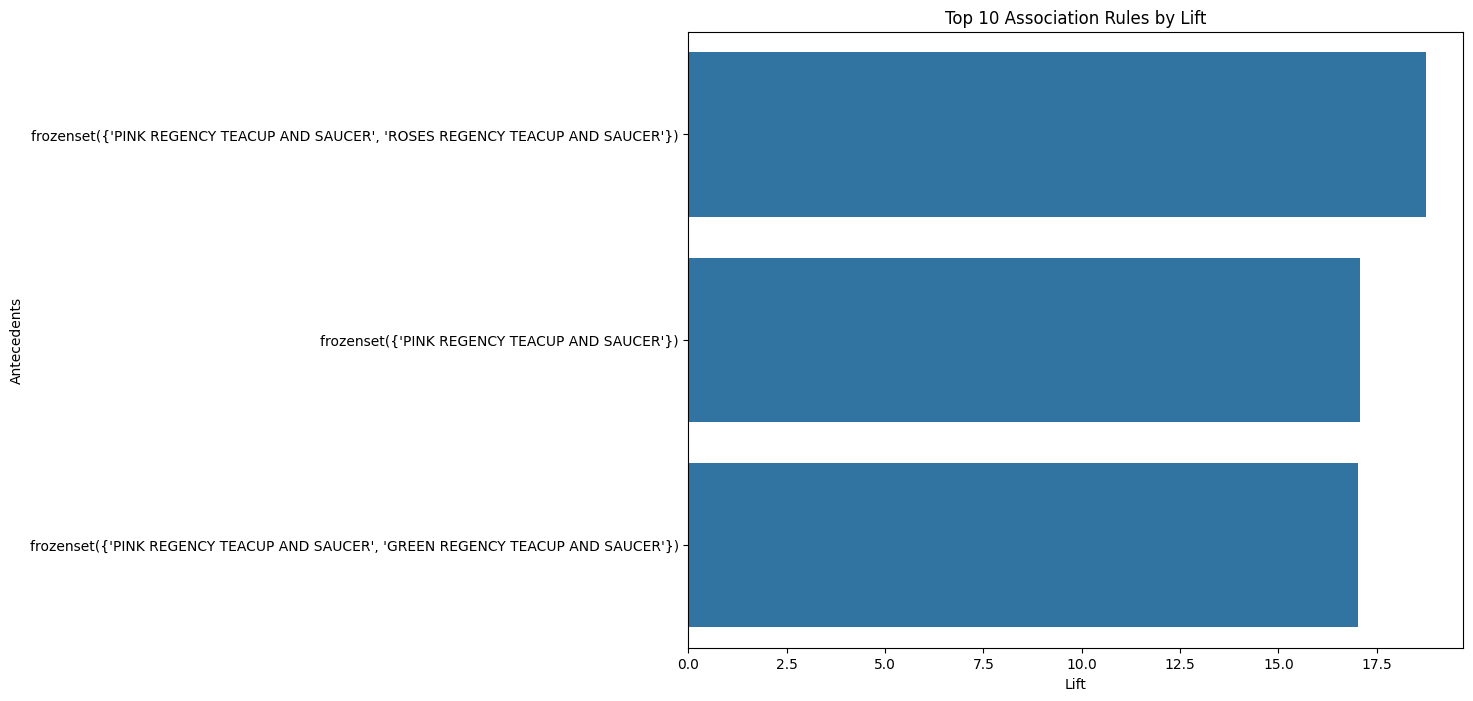

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter top rules by lift
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# Plot the top rules by lift
plt.figure(figsize=(10, 8))
sns.barplot(x='lift', y='antecedents', data=top_rules)
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Antecedents')
plt.show()

In [27]:
fp_growth = fpgrowth(encoded_data, min_support=0.01, use_colnames=True)
rules_df =association_rules(fp_growth, metric='confidence')


In [28]:
rules_df[60:69]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
60,"(POPPY'S PLAYHOUSE LIVINGROOM, POPPY'S PLAYHOU...",(POPPY'S PLAYHOUSE BEDROOM),0.012593,0.020396,0.010766,0.854902,41.915036,0.010509,6.751324,0.988592
61,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.036347,0.048151,0.029878,0.822011,17.071690,0.028128,5.347796,0.976933
62,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...",(GREEN REGENCY TEACUP AND SAUCER),0.018273,0.048151,0.015902,0.870270,18.073951,0.015022,7.337173,0.962255
63,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...",(ROSES REGENCY TEACUP AND SAUCER),0.018273,0.050027,0.015260,0.835135,16.693634,0.014346,5.762130,0.957595
64,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...",(GREEN REGENCY TEACUP AND SAUCER),0.015260,0.048151,0.013828,0.906149,18.819086,0.013093,10.142120,0.961535
65,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.015902,0.050027,0.013828,0.869565,17.381862,0.013032,7.283125,0.957698
66,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.029878,0.050027,0.025433,0.851240,17.015550,0.023939,6.385929,0.970218
67,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.028150,0.048151,0.025433,0.903509,18.764256,0.024078,9.864622,0.974128
68,"(JUMBO BAG PINK POLKADOT, JUMBO BAG SCANDINAVI...",(JUMBO BAG RED RETROSPOT),0.015556,0.101931,0.013087,0.841270,8.253330,0.011501,5.657835,0.892724


In [29]:
product_rec = rules_df[['antecedents','consequents']]

product_rec.columns = ['Product','Recom']
product_rec

,Product,Recom
0,"(JUMBO STORAGE BAG SUKI, JUMBO BAG BAROQUE BL...",(JUMBO BAG RED RETROSPOT)
1,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",(JUMBO BAG RED RETROSPOT)
2,"(STRAWBERRY CHARLOTTE BAG, CHARLOTTE BAG SUKI ...",(RED RETROSPOT CHARLOTTE BAG)
3,"(STRAWBERRY CHARLOTTE BAG, CHARLOTTE BAG PINK ...",(RED RETROSPOT CHARLOTTE BAG)
4,"(STRAWBERRY CHARLOTTE BAG, CHARLOTTE BAG SUKI ...",(RED RETROSPOT CHARLOTTE BAG)
...,...,...
74,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE GREEN)
75,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE ROSES)
76,"(REGENCY TEA PLATE PINK, REGENCY TEA PLATE ROSES)",(REGENCY TEA PLATE GREEN)
77,"(REGENCY TEA PLATE PINK, REGENCY TEA PLATE GREEN)",(REGENCY TEA PLATE ROSES)


In [30]:
product_rec

,Product,Recom
0,"(JUMBO STORAGE BAG SUKI, JUMBO BAG BAROQUE BL...",(JUMBO BAG RED RETROSPOT)
1,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",(JUMBO BAG RED RETROSPOT)
2,"(STRAWBERRY CHARLOTTE BAG, CHARLOTTE BAG SUKI ...",(RED RETROSPOT CHARLOTTE BAG)
3,"(STRAWBERRY CHARLOTTE BAG, CHARLOTTE BAG PINK ...",(RED RETROSPOT CHARLOTTE BAG)
4,"(STRAWBERRY CHARLOTTE BAG, CHARLOTTE BAG SUKI ...",(RED RETROSPOT CHARLOTTE BAG)
...,...,...
74,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE GREEN)
75,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE ROSES)
76,"(REGENCY TEA PLATE PINK, REGENCY TEA PLATE ROSES)",(REGENCY TEA PLATE GREEN)
77,"(REGENCY TEA PLATE PINK, REGENCY TEA PLATE GREEN)",(REGENCY TEA PLATE ROSES)


In [37]:
with open('product_rec.pkl', 'wb') as f:
    pickle.dump(product_rec,f)

In [31]:
def get_recommendations(item, rules_df):
    recommendations = rules_df[rules_df['Product'].apply(lambda x: item in x)]
    #recommendations = recommendations['Recom']
 # Check if 'consequents' column contains iterable items
    if recommendations['Recom'].apply(lambda x: isinstance(x, (list, set, tuple))).all():
        # Flatten the list of recommended items and remove duplicates
        unique_recommendations = pd.Series([rec for sublist in recommendations['Recom'] for rec in sublist]).drop_duplicates()
    else:
        # Handle cases where 'consequents' is not iterable
        unique_recommendations = pd.Series(recommendations['Recom']).drop_duplicates()
    
    
    return unique_recommendations

# Example usage
item_to_recommend = 'PINK REGENCY TEACUP AND SAUCER'
recommended_items = get_recommendations(item_to_recommend, product_rec)
print(recommended_items)

61    (GREEN REGENCY TEACUP AND SAUCER)
63    (ROSES REGENCY TEACUP AND SAUCER)
Name: Recom, dtype: object
